In [1]:
import pandas as pd
import json
import urllib.request
from urllib.error import HTTPError

In [2]:
valid_scan_month03 = pd.read_csv("validation-scans_raw-2020-month03.csv")
len(valid_scan_month03)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


141777

In [3]:
valid_scan_month04 = pd.read_csv("validation-scans_raw-2020-month03.csv")
len(valid_scan_month04)

141777

In [4]:
result = valid_scan_month03.append(valid_scan_month04, sort=False)
len(result)

283554

In [5]:
valid_scan_month05 = pd.read_csv("validation-scans_raw-2020-month05.csv")
len(valid_scan_month05)

22128

In [6]:
result = result.append(valid_scan_month05, sort=False)
len(result)

305682

In [7]:
valid_scan_month06 = pd.read_csv("validation-scans_raw-2020-month06.csv")
len(valid_scan_month06)

45676

In [8]:
result = result.append(valid_scan_month06, sort=False)
len(result)

351358

In [9]:
valid_scan_month0701 = pd.read_csv("validation-scans_raw-2020-07-01.csv")
len(valid_scan_month0701)

2291

In [10]:
result = result.append(valid_scan_month0701, sort=False)
len(result)

353649

In [11]:
valid_scan_month0702 = pd.read_csv("validation-scans_raw-2020-07-02.csv")
len(valid_scan_month0702)

2316

In [12]:
result = result.append(valid_scan_month0702, sort=False)
len(result)

355965

In [13]:
valid_scan_month0703 = pd.read_csv("validation-scans_raw-2020-07-03.csv")
len(valid_scan_month0703)

1989

In [14]:
result = result.append(valid_scan_month0703, sort=False)
len(result)

357954

In [15]:
valid_scan_month0704 = pd.read_csv("validation-scans_raw-2020-07-04.csv")
len(valid_scan_month0704)

1807

In [16]:
result = result.append(valid_scan_month0704, sort=False)
len(result)

359761

In [17]:
valid_scan_month0705 = pd.read_csv("validation-scans_raw-2020-07-05.csv")
len(valid_scan_month0705)

2047

In [18]:
result = result.append(valid_scan_month0705, sort=False)
len(result)

361808

In [19]:
valid_scan_month070612 = pd.read_csv("validation-scans_raw-2020-06 to 12.csv")
len(valid_scan_month070612)

14923

In [20]:
result = result.append(valid_scan_month070612, sort=False)
len(result)

376731

In [21]:
result = result[(result['Ticket Type'] != "Monthly") | (result['Ticket Type'] != "Weekly") ]

In [22]:
result.dtypes


Scan Timestamp      object
Action Name         object
Ticket Type         object
Ticket Number       object
Origin ID           object
Origin Name         object
Destination ID      object
Destination Name    object
Expiry Time         object
Vehicle ID          object
dtype: object

In [23]:
from datetime import datetime

result['Scan Timestamp'] = pd.to_datetime(result['Scan Timestamp'])
result.head()

,Scan Timestamp,Action Name,Ticket Type,Ticket Number,Origin ID,Origin Name,Destination ID,Destination Name,Expiry Time,Vehicle ID
0,2020-02-16 17:18:00,Final,One Way Senior / Medicare,WTTB5GLT7VF,1,Grand Central Terminal,252,New Haven,4/14/2020 23:59,6546
1,2020-02-16 17:19:00,Final,One Way Senior / Medicare,WTTDQQPT7VU,1,Grand Central Terminal,234,South Norwalk,4/14/2020 23:59,6546
2,2020-02-16 17:20:00,Final,One Way Off-Peak,WTTBDK5TXVK,1,Grand Central Terminal,226,Stamford,4/15/2020 23:59,6546
3,2020-02-16 17:20:00,Mid-Journey,One Way Off-Peak,WTTABERT7VS,278,Bethel,1,Grand Central Terminal,4/14/2020 23:59,6546
4,2020-02-16 17:20:00,Final,One Way Off-Peak,WTTDG2NTXVT,230,Darien,1,Grand Central Terminal,4/15/2020 23:59,6546


In [24]:
result.dtypes

Scan Timestamp      datetime64[ns]
Action Name                 object
Ticket Type                 object
Ticket Number               object
Origin ID                   object
Origin Name                 object
Destination ID              object
Destination Name            object
Expiry Time                 object
Vehicle ID                  object
dtype: object

In [25]:
result_group = result.groupby(['Origin Name','Ticket Type' ,pd.Grouper(key='Scan Timestamp', freq='60min')])['Ticket Number'].apply(set).reset_index()

In [26]:
result_group['passenger_count'] = result_group['Ticket Number'].str.len()

In [27]:
def route(data):
    if "Off-Peak" in data: 
        return "Off Peak"
    elif "Off Peak" in data:
        return "Off Peak"
    else:
        return "Peak"

In [28]:
result_group['route'] = result_group["Ticket Type"].apply(lambda x : route(x))

In [29]:
result_group.sort_values("passenger_count")

,Origin Name,Ticket Type,Scan Timestamp,Ticket Number,passenger_count,route
0,Ansonia,Monthly,2020-03-04 06:00:00,{WTTDBSBWHV3},1,Peak
49579,New Rochelle,Weekly,2020-03-07 13:00:00,{WTTB7GLYHV3},1,Peak
49580,New Rochelle,Weekly,2020-03-16 06:00:00,{WTTCTNV2HVA},1,Peak
49581,New Rochelle,Weekly,2020-03-16 14:00:00,{WTTDVBL27VO},1,Peak
49582,New Rochelle,Weekly,2020-03-17 16:00:00,{WTTCCB52PV3},1,Peak
49583,New Rochelle,Weekly,2020-05-24 08:00:00,{WTTA67X4XVF},1,Peak
49584,New Rochelle,Weekly,2020-05-26 05:00:00,{WTTC4T74XV7},1,Peak
49585,New Rochelle,Weekly,2020-05-30 20:00:00,{WTTBDBB4PVS},1,Peak
49586,New Rochelle,Weekly,2020-06-04 06:00:00,{WTTBEON4PVQ},1,Peak
49587,New Rochelle,Weekly,2020-06-10 17:00:00,{WTTATFT4HVA},1,Peak


In [30]:
result_group = result_group.drop(columns  = ["Ticket Type","Ticket Number"])

In [31]:
result_group.to_csv("final_output.csv")


In [32]:
import matplotlib.pyplot as plt

In [38]:
result_group['datetime'] = pd.to_datetime(result_group['Scan Timestamp'])

In [40]:
df = result_group[(result_group["Origin Name"] == 'Grand Central Terminal')][['datetime','passenger_count']]


In [41]:
df.set_index('datetime',inplace = True)

In [44]:
df = df.groupby('datetime').agg({'passenger_count':'sum'})

In [45]:
# plt.figure(figsize=(30,15))
# df[df['datetime'] > '2020-04-01'].plot()


In [46]:
df.to_csv("final_output3.csv")

In [47]:
df.reset_index(inplace=True)

In [48]:
df1 = df[df['datetime'] > '2020-04-01']

In [49]:
df1.set_index('datetime',inplace = True)

Text(0.5, 1.0, 'Number of Passengers Leaving Grand Central During Peak')

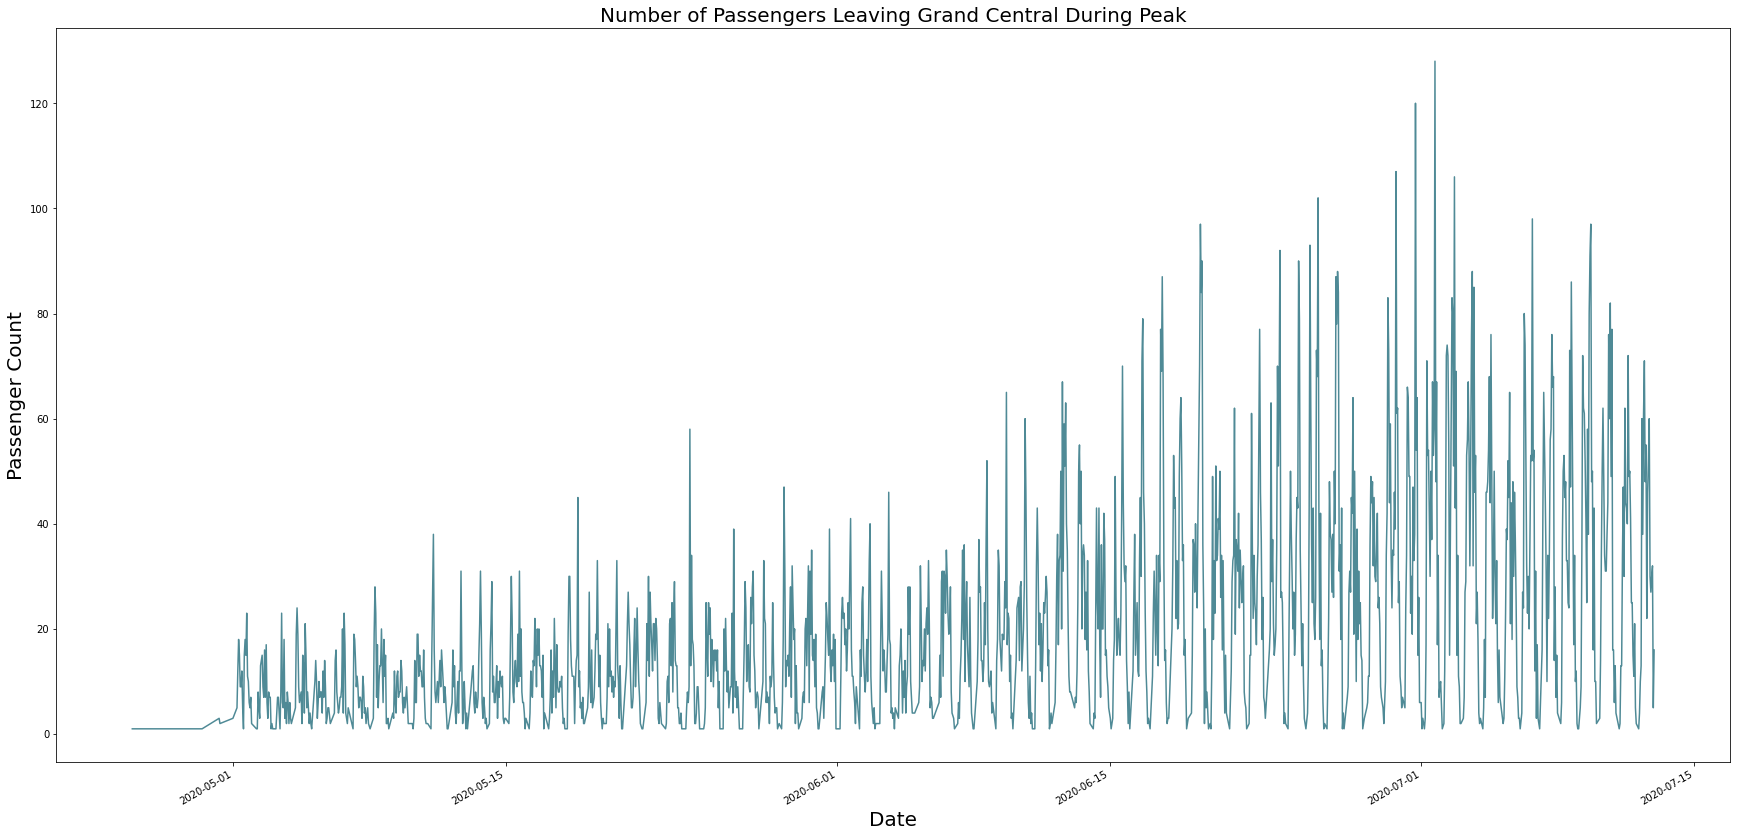

In [62]:

ax = df1.plot(figsize =(30, 15), legend=False,color='#4f8a96')
ax.set_xlabel('Date', size=20)
ax.set_ylabel('Passenger Count', size =20)
ax.set_title("Number of Passengers Leaving Grand Central During Peak", size= 20)

In [63]:
fig = ax.get_figure()
fig.savefig("GCT_peak.png")